In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline

[From Josh Vandenham, precipitation permutations](https://fivethirtyeight.com/features/the-little-mathematically-determined-house-on-the-prairie/):

Louie walks to and from work every day. In his city, there is a 50 percent chance of rain each morning and an independent 40 percent chance each evening. His habit is to bring (and use) an umbrella if it’s raining when he leaves the house or office, but to leave them all behind if not. Louie owns three umbrellas.

On Sunday night, two are with him at home and one is at his office. Assuming it never starts raining during his walk to his home or office, what is the probability that he makes it through the work week without getting wet?

In [2]:
def morning():
    """
    a 50 percent chance of rain each morning
    """
    x = np.random.choice(['rain','no rain'],size=1,p=[.5,.5])[0]
    return x
def evening():
    """
    40 percent chance each evening
    """
    x = np.random.choice(['rain','no rain'],size=1,p=[.4,.6])[0]
    return x
week = 7 # say, Louie works 7 days a week
n_sim = int(1e4) # simulations
n_var = int(500) # cycles

In [3]:
scores = np.zeros((n_var,)) # preallocation
for ii in range(n_var):
    results = []
    for sim in tqdm(range(n_sim)):
        # before each simulation of the week, re-initialize the starting state
        # 2 in home and 1 in work
        starting_state = {'home':2,
                          'work':1}
        # 1 is where Louie is
        starting_point = {'home':1,
                          'work':0}
        current_state = starting_state
        current_point = starting_point
        result = []
        for day in range(week):
            #print('day {} morning'.format(day+1),current_state,current_point)
            # leaving home in the morning
            weather = morning() # roll the dice
            #print(weather)
            if weather == 'rain':
                current_state['home'] -= 1 # if it rains in the morning, take an umbrella to work
                current_state['work'] += 1 # so there is one more umbrella in the office
                current_point['home'] = 0 # change location
                current_point['work'] = 1 # change location
            else:
                current_point['home'] = 0 # if it doesn't rain in the morning, no change of umbrella, but location
                current_point['work'] = 1 # change location
            # saving the current state of the umbrella
            result.append([current_state['home'],current_state['work']])
            #print('after morning',current_state,current_point)
            # going home in the evening
            weather = evening()
            #print(weather)
            if weather == 'rain':
                current_state['home'] += 1 # if it rains in the evening, take an umbrella to home
                current_state['work'] -= 1 # so there is one less umbrella in the office
                current_point['home'] = 1 # change location
                current_point['work'] = 0 # change location
            else:
                current_point['home'] = 1 # if it doesn't rain in the evening, no change of umbrella, but location
                current_point['work'] = 0 # change location
            # saving the current state of the umbrella
            result.append([current_state['home'],current_state['work']])
            #print('after evening',current_state,current_point)
        # flatten the 2D array, and see if any of the element is less than zero
        # if the number of the nagative element is less and equal than zero, he goes through the week
        results.append(np.sum(np.array(result).flatten() < 0) <= 0)
    scores[ii] = float(np.sum(results)) / len(results) # calculate the probability

100%|██████████████████████████████████| 10000/10000 [00:06<00:00, 1450.84it/s]


100%|██████████████████████████████████| 10000/10000 [00:07<00:00, 1428.04it/s]


100%|██████████████████████████████████| 10000/10000 [00:06<00:00, 1613.45it/s]


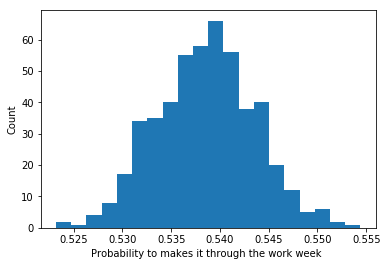

In [4]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(scores,bins = 20)
_=ax.set(xlabel='Probability to makes it through the work week ',ylabel='Count')

Surprisingly, more than 50% chance he could make it through the work week (all 7 days) with such a random setting of the umbrella situation. Let's step back a little bit and think about the math behind this:

$$P(\text{rain in morning}) = 0.5$$
$$P(\text{rain in evening}) = 0.4$$
Since for each day, there will be 4 combinations of raining: 
<br /> rain in morning - rain in evening $$= P(\text{rain in morming}) * P(\text{rain in evening}) = 0.5 * 0.4 = 0.2$$
<br /> rain in morning - no rain in evening $$= P(\text{rain in morming}) * P(\text{no rain in evening}) = 0.5 * (1 - 0.4) = 0.3$$
<br /> no rain in morning - rain in evening $$= P(\text{no rain in morming}) * P(\text{rain in evening}) = (1 - 0.5) * 0.4 = 0.2$$
<br /> no rain in morning - no rain in evening $$= P(\text{no rain in morming}) * P(\text{no rain in evening}) = (1 - 0.5) * (1 - 0.4) = 0.3$$

The tricky part of me not being able to directly compute the theoretical probability is that he has 3 umbrellas and 2 at home and 1 in the office.
<br /> The calculation requires me to take it to account that if-then probability, which simulation is best suited for such case.